# Predicting whether a comment on Twitter is Toxic with NLP and Machine Learning

By Victor Kiptoo


# 1. Project Background and Aim.
Twitter is social network platform where people have interaction and discussion about several issues affecting the society. It is a great platform to share and get information about what is going on around the globe. A platform with global reach comes with the problem of people using toxic and obscene language with the intention of abusing people hence a good platform is destroyed by a few bad apples. This project is aimed at recognizing obscene and toxic tweets using NLP and machine learning techniques. 

# 2. Data Description 
I got data from kaggle.


In [1]:
!pip install memory-profiler
%load_ext memory_profiler
%memit

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp36-none-any.whl size=30181 sha256=174358666473dfc1698cc92d725257aee9aad18f6f8a91929f9471879e54f135
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler
peak memory: 106.79 MiB, increment: 0.05 MiB


In [2]:
import pandas as pd #data manipulation and wrangling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk #natural processing toolkit
import re
import string #string manipulation


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/My Drive/train.csv")
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
dataset.info() #there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


# Explanatory Data Analysis

In [7]:
dataset['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [8]:

df_toxic = dataset.drop(columns = ['id', 'comment_text'])
count = []
categories = list(df_toxic.columns.values)
for i in categories:
    count.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(count, columns = ['category', 'no_of_comments'])

In [9]:
df_stats

,category,no_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


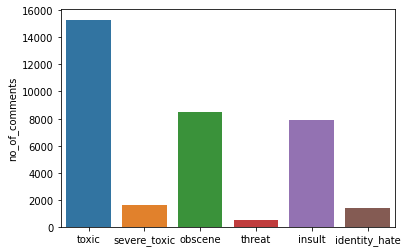

In [10]:

#getting count of each label 
category = list(df_stats.category)
sns.barplot(x = category, y = df_stats.no_of_comments, data=df_stats)

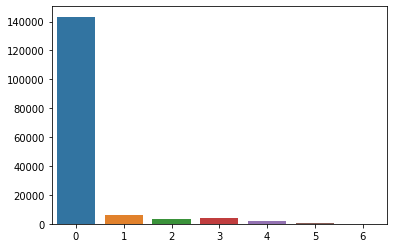

In [11]:
#getting the count of count of text occuring in eac
rowsums = dataset.iloc[:, 2:].sum(axis=1)
#rowsums

x = rowsums.value_counts()
sns.barplot(x = x.index, y=x.values)

# Data cleaning and preparation


In [12]:
nltk.download()
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
#from nltk.tokenize import TweetTokenizer
#from nltk import pos_tag


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> popular
       | 
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package gazetteers to /root/nltk_data...
       |   Unzipping corpora/gazetteers.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package inaugural to /root/nltk_data...
       |   Unzipping corpora/inaugural.zip.
       | Downloading package movie_reviews to /root/nltk_data...
       |   Unzipping corpora/movie_reviews.zip.
       | Downloading package names to /

In [13]:
dataset["comment_text"] = dataset["comment_text"].apply(lambda x: x[:800])


In [14]:
#TweetTokenizer
#pos_tag
#stopwords
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
def change_apo(text):
  for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
  return text

dataset["comment_text"] = dataset["comment_text"].apply(lambda x: change_apo(x))
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. i...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
# function to remove punctuation, tokenize, remove stopwords and stem
def clean_text(text):
    
   
    text = ''.join([i for i in text if not i.isdigit()]) #remove integer values
    text = "".join([word.lower() for word in text if word not in string.punctuation])#make lowercase and remove punctuation
    text = ' '.join( [word for word in text.split() if len(word)>2] )#remove words less than 2 letters
     
    tokens = re.split('\W+', text) 
    #words = [wn.lemmatize(word, 'v') for word in tokens]
    text = [ps.stem(word) for word in tokens if word not in stopwords] 
    text = [wn.lemmatize(word) for word in text] 
    
    text = " ".join(text)
    return text

In [16]:
clean_text('I an the 10th most 4hbsbsa buiavia')

'hbsbsa buiavia'

In [ ]:

dataset_test = dataset[0:50].copy()
dataset_test["clean_comment"] = dataset_test["comment_text"].apply(lambda x: clean_text(x))
print(dataset_test.head())

                 id  ...                                      clean_comment
0  0000997932d777bf  ...  explan edit made usernam hardcor metallica fan...
1  000103f0d9cfb60f  ...  daww match background colour seemingli stuck t...
2  000113f07ec002fd  ...  hey man realli tri edit war guy constantli rem...
3  0001b41b1c6bb37e  ...  cannot make real suggest improv wonder section...
4  0001d958c54c6e35  ...                         sir hero chanc rememb page

[5 rows x 9 columns]


In [17]:


dataset["clean_comment"] = dataset["comment_text"].apply(lambda x: clean_text(x))
dataset.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0,daww match background colour seemingli stuck t...
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. i...",0,0,0,0,0,0,hey man realli tri edit war guy constantli rem...
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0,cannot make real suggest improv wonder section...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page


## As perviously stated, a text is considered a series of words. To run an algorithm we have to change text files to numerical categories. Each unique word in our dictionary will correspond to a feature (descriptive feature). I used TF-IDF(Term Frequency times inverse document frequency.) solves this. 

In [103]:
import pickle

In [104]:
# tfidt Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #
tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df=0.0009,strip_accents='unicode', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', sublinear_tf=True)
X_train_tfidf = tfidf_vect.fit_transform(dataset.clean_comment.dropna())
X_train_tfidf.shape

(159571, 2519)

In [105]:
print(tfidf_vect.get_feature_names())
features = tfidf_vect.get_feature_names()

['abil', 'abl', 'absolut', 'absurd', 'abus', 'academ', 'academi', 'accept', 'access', 'accid', 'accident', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accus', 'achiev', 'acknowledg', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actual', 'ad', 'adam', 'add', 'addit', 'address', 'adequ', 'adher', 'adjust', 'admin', 'administr', 'adminship', 'admir', 'admit', 'adopt', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advoc', 'afd', 'affair', 'affect', 'affili', 'afraid', 'africa', 'african', 'age', 'agenc', 'agenda', 'agent', 'aggress', 'ago', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'aircraft', 'aka', 'albanian', 'album', 'alert', 'alex', 'aliv', 'alleg', 'alli', 'allow', 'almost', 'alon', 'along', 'alot', 'alphabet', 'alreadi', 'alright', 'also', 'alter', 'altern', 'although', 'altogeth', 'alway', 'amaz', 'ambigu', 'amend', 'america', 'american', 'among', 'amongst', 'amount', 'amus', 'analog', 'analysi', 'ancient', 'andor', 

In [106]:
pickle.dump(tfidf_vect, open("tfidf.pickle", "wb"))
pickle.dump(features, open("comment_features.pickle", "wb"))

# Feature Engineering
In this section, I am trying to create features hidden in the dataset which might help us improve your model. There are 2 types of features I will look at:
1. Indirect Features - Here I will look at count of sentences, count of words, count of punctuation e.tc to determine if there is a variation in toxic and non-toxic tweets.
2. Direct Features - I am going to use unigrams and bigrams of vectorized words in the previous step to get toxic combination of words.

In [58]:
# Indirect Features
def indirectFeatures(data, comment_column):
    data = data
    comment_column = comment_column
    data["count_sent"] = data[comment_column].apply(lambda x: len(re.findall("\n", str(x)))+1)
    data["count_word"] = data[comment_column].apply(lambda x: len(str(x).split()))
    data["count_unique_word"] = data[comment_column].apply(lambda x: len(set(str(x).split())))
    data["count_punct"] = data[comment_column].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #data["count_words_upper"] = data.comment_column.apply(lambda x: len[w for w in str(x) if w.isupper()])
    data["count_stopwords"] = data[comment_column].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
    data["unique_perc"] = data["count_unique_word"]/data["count_word"]
    data['upper'] = data[comment_column].apply(lambda x: sum(letter.isupper() for letter in x)) 
    data['upper_perc'] = data['upper']/len(data[comment_column])
    
    return data

dataset = indirectFeatures(dataset, "comment_text")

In [59]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment,count_sent,count_word,count_unique_word,count_punct,count_stopwords,unique_perc,upper,upper_perc
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...,2,46,41,7,22,0.891304,17,0.000107
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0,daww match background colour seemingli stuck t...,1,18,18,11,4,1.000000,8,0.000050
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. i...",0,0,0,0,0,0,hey man realli tri edit war guy constantli rem...,1,47,42,5,25,0.893617,3,0.000019
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0,cannot make real suggest improv wonder section...,5,117,84,20,59,0.717949,10,0.000063
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page,1,17,16,5,9,0.941176,2,0.000013


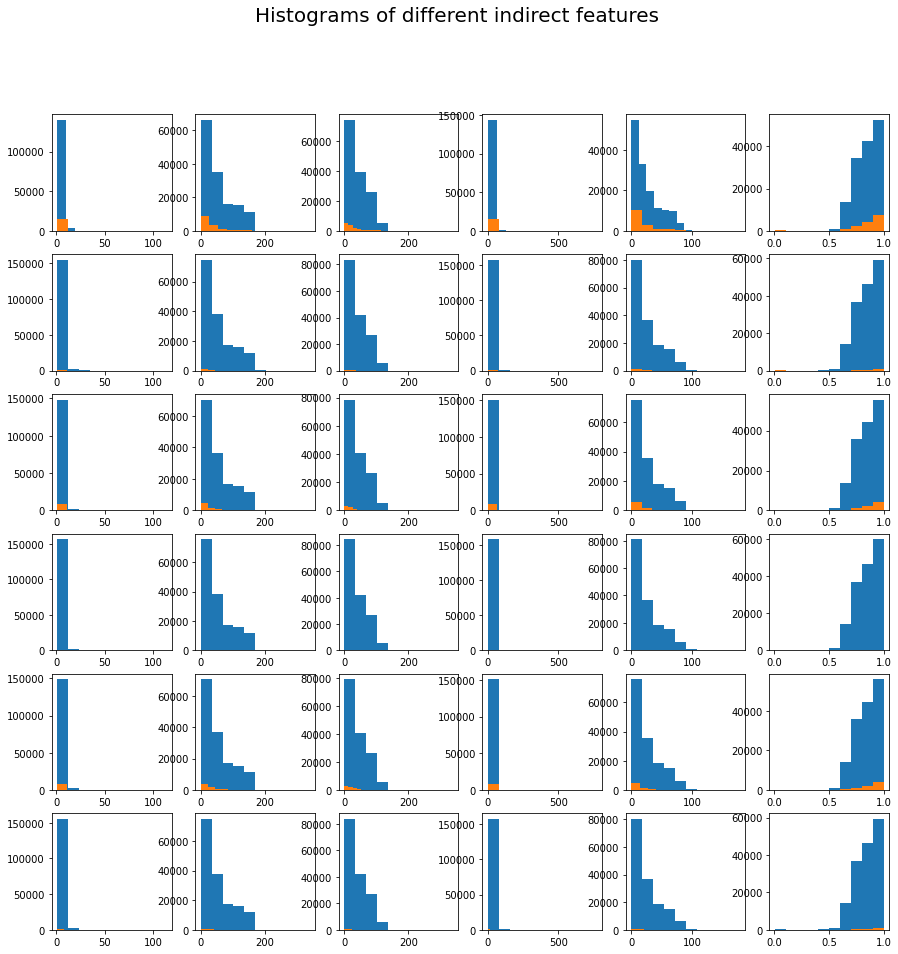

In [60]:

label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
indirect_features =  ['count_sent', 'count_word','count_unique_word', 'count_punct', 'count_stopwords', 'unique_perc']
fig, axs = plt.subplots(6,6, sharex= False, sharey = False, figsize=(15,15))
plt.suptitle('Histograms of different indirect features', fontsize=20)
#plt.figure(figsize=(15,12))
for i, label in enumerate(label):
    #plt.title(label, fontsize=15)
    for j, feature in enumerate(indirect_features):
        
        axs[i,j].hist(dataset.loc[dataset[label] == 0, feature], label="non toxic")
        axs[i,j].hist(dataset.loc[dataset[label] == 1, feature], label="Toxic")
        
        
plt.show()

In [61]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment,count_sent,count_word,count_unique_word,count_punct,count_stopwords,unique_perc,upper,upper_perc
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...,2,46,41,7,22,0.891304,17,0.000107
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0,daww match background colour seemingli stuck t...,1,18,18,11,4,1.000000,8,0.000050
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. i...",0,0,0,0,0,0,hey man realli tri edit war guy constantli rem...,1,47,42,5,25,0.893617,3,0.000019
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0,cannot make real suggest improv wonder section...,5,117,84,20,59,0.717949,10,0.000063
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page,1,17,16,5,9,0.941176,2,0.000013


# Direct Features
a) Unigrams - After that we use this tfv to transform the comment_text column.. I’m using clean_comment as at this moment. As type “U” is definitely presentative of “Unigrams”

In [62]:
train_unigrams = tfidf_vect.transform(dataset['clean_comment'].astype('U'))
#print(train_unigrams)
#test_unigrams = tfv.transform(toxic_test[“clean_comment”].astype(‘U’))

In [63]:
#Get the top 25 features with top TF-IDF Values in a row
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    print(df)
    df.columns = ['feature','tfidf']
    return df

In [64]:
top_tfidf_feats(train_unigrams, features)

      0                                                  1
0  abil    (0, 2515)\t0.29240106095792967\n  (0, 2405)\...


,feature,tfidf
0,abil,"(0, 2515)\t0.29240106095792967\n (0, 2405)\..."


In [65]:
#Get the top 25 features with top TF-IDF Values in a row in a specific document\
def top_feats_in_doc(Xtr,features,row_id,top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [66]:
top_feats_in_doc(train_unigrams, features, 10)

            0         1
0    rational  0.404339
1        fair  0.392282
2        imag  0.302792
3     specifi  0.251163
4         use  0.248020
5      explan  0.225672
6    descript  0.224201
7      upload  0.214947
8        page  0.162984
9   constitut  0.146439
10    consist  0.144302
11      locat  0.143329
12      click  0.140519
13     medium  0.131301
14    templat  0.120451
15      addit  0.119909
16     specif  0.119816
17       edit  0.116226
18       must  0.113797
19      check  0.108981
20      notic  0.107123
21      write  0.105834
22     consid  0.101675
23     includ  0.099778
24  contribut  0.099415


,feature,tfidf
0,rational,0.404339
1,fair,0.392282
2,imag,0.302792
3,specifi,0.251163
4,use,0.248020
5,explan,0.225672
6,descript,0.224201
7,upload,0.214947
8,page,0.162984
9,constitut,0.146439


In [67]:
#Return the top n features that on average are most important amongst documents in rows indentified by indices in grp_ids.
def top_mean_feats(Xtr,features, grp_ids, min_tfidf=0.1, top_n=25):
    D = Xtr[grp_ids].toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [68]:
#Return a list of dfs, where each df holds top_n features and their mean tfidf value calculated across documents with the same class label\
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols = dataset.columns
    for col in cols:
        ids = dataset.index[dataset[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf,top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
        return dfs

In [69]:
#Return the list of top_n features and its means features for the toxic_comment
label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols = label
    for col in cols:
            ids = dataset.index[dataset[col]==1]
            #print(ids)
            feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
            feats_df.label = col
            print(feats_df.label)
            dfs.append(feats_df)
    return dfs

In [70]:
tfidf_top_n_per_class = top_feats_by_class(train_unigrams,features)

            0         1
0        fuck  0.091185
1        shit  0.026793
2        suck  0.025293
3         get  0.021267
4       bitch  0.020774
5      stupid  0.020496
6        like  0.020387
7       idiot  0.018184
8        stop  0.017712
9      asshol  0.016628
10  wikipedia  0.016330
11      block  0.015755
12        gay  0.015258
13       dick  0.014814
14       page  0.014396
15     faggot  0.014098
16       cunt  0.013475
17       edit  0.013349
18       know  0.013291
19       life  0.013062
toxic
             0         1
0         fuck  0.270639
1        bitch  0.062682
2         suck  0.059647
3         shit  0.054695
4       asshol  0.040827
5         dick  0.036992
6         cunt  0.036631
7       faggot  0.033261
8         cock  0.027292
9   motherfuck  0.025107
10         get  0.022502
11      fucker  0.020301
12         gay  0.020116
13      stupid  0.019793
14         die  0.019679
15        piec  0.019310
16      fuckin  0.019021
17      nigger  0.018557
18      mother 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


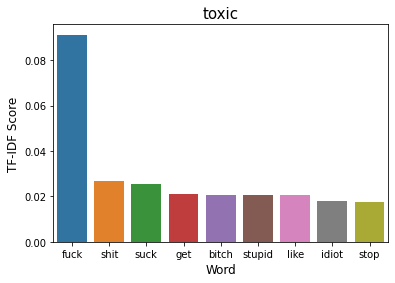

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


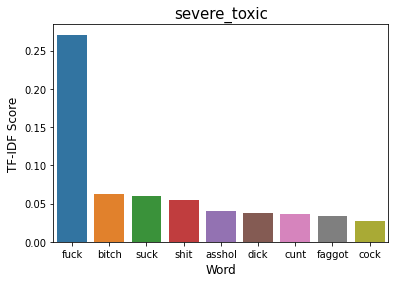

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


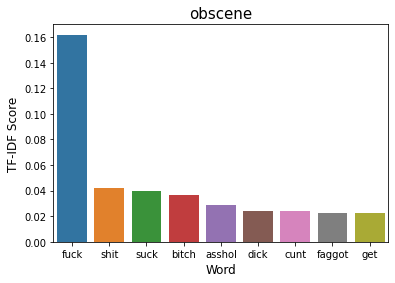

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


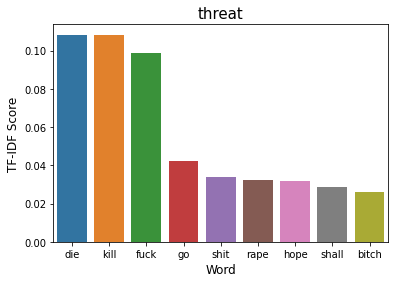

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


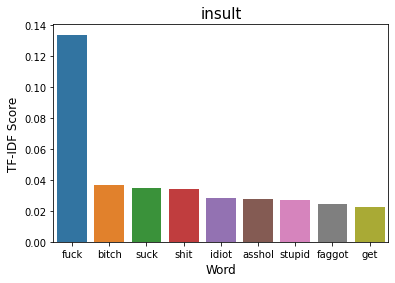

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


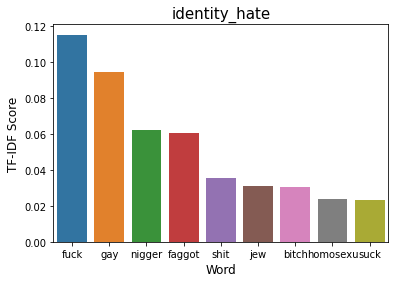

In [71]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

plt.title('Top 20 Most Frequent Words per Toxic Label,Unigrams,TFIDF', fontsize=20)
subplot = 0
for label in label:
    subplot+=1
    # plt.figure()
    sns.barplot(tfidf_top_n_per_class[subplot-1].feature.iloc[0:9],tfidf_top_n_per_class[subplot-1].tfidf.iloc[0:19])
    plt.title(label, fontsize=15)
    plt.xlabel('Word',fontsize=12)
    plt.ylabel('TF-IDF Score', fontsize=12)
    plt.show()

In [72]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
for col in range(len(label)):
  toxic_list = list(tfidf_top_n_per_class[col].feature.iloc[0:9])
  value = label[col]

In [73]:
toxic = []
severe_toxic = []
obscene = []
threat = []
insult = []
identity_hate =[]
for col in range(len(label)):
  toxic_list = list(tfidf_top_n_per_class[col].feature.iloc[0:9])
  value = label[col]
  #print(value)
  for i in range(len(dataset.clean_comment)):
    #print(toxic_list)
    check = any(substring in dataset.clean_comment[i]  for substring in toxic_list) 
    #print(check)
    if check is True:
      vars()[value].append(1)
    else:
      vars()[value].append(0)
    
    
    

In [74]:
dataset['contains_toxic_word'] = toxic 
dataset['contains_severe_toxic_word'] = severe_toxic
dataset['contains_obscene_word'] = obscene 
dataset['contains_threat_word'] = threat
dataset['contains_insult_word'] = insult 
dataset['contains_identity_hate_word'] =identity_hate 
dataset.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment,count_sent,count_word,count_unique_word,count_punct,count_stopwords,unique_perc,upper,upper_perc,contains_toxic_word,contains_severe_toxic_word,contains_obscene_word,contains_threat_word,contains_insult_word,contains_identity_hate_word
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...,2,46,41,7,22,0.891304,17,0.000107,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0,daww match background colour seemingli stuck t...,1,18,18,11,4,1.000000,8,0.000050,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. i...",0,0,0,0,0,0,hey man realli tri edit war guy constantli rem...,1,47,42,5,25,0.893617,3,0.000019,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0,cannot make real suggest improv wonder section...,5,117,84,20,59,0.717949,10,0.000063,0,0,0,1,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page,1,17,16,5,9,0.941176,2,0.000013,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,congratul well use tool well talk,3,13,12,4,4,0.923077,1,0.000006,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksuck piss around work,1,8,8,0,4,1.000000,37,0.000232,1,1,1,0,1,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,vandal matt shirvington articl revert plea ban,1,21,20,3,13,0.952381,4,0.000025,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,sorri word nonsens offens anyway intend write ...,1,89,71,17,49,0.797753,7,0.000044,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,align subject contrari dulithgow,1,12,12,0,8,1.000000,2,0.000013,0,0,0,1,0,0


# Preparing for Modelling 

Before Modelling, I didn't see a relationship between indirect features and toxicity of the message therefore I will create a dataframe of only tfidt array and direct features

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
X_features = pd.concat([dataset['contains_toxic_word'],dataset['contains_severe_toxic_word'], dataset['contains_obscene_word'], dataset['contains_threat_word'], dataset['contains_insult_word'], dataset['contains_identity_hate_word'], pd.DataFrame(X_train_tfidf.toarray(), columns=features)], axis=1)
X_features.head()

,contains_toxic_word,contains_severe_toxic_word,contains_obscene_word,contains_threat_word,contains_insult_word,contains_identity_hate_word,abil,abl,absolut,absurd,abus,academ,academi,accept,access,accid,accident,accomplish,accord,accordingli,account,accur,accuraci,accus,achiev,acknowledg,across,act,action,activ,activist,actor,actual,ad,adam,add,addit,address,adequ,adher,...,without,wizard,woman,wonder,wont,word,work,world,worldwid,worri,wors,worst,worth,worthi,worthless,would,wow,wpblp,wpnpov,wpor,wpr,wpv,wrestl,write,writer,written,wrong,wrote,wtf,wwe,ye,yeah,year,yep,yesterday,yet,york,young,youtub,zero
0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292401,0.0,0.0,0.0
1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.150672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [80]:
categories = list(dataset.columns[2:8])
labels = dataset[categories]
labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_features, labels, test_size=0.2)

# Modelling.
We are now ready to create a model using the training data and validate the accuracy of the model using the holdout test data. Since there is more than 1 label, I will try to using onevsrestClassifier.

**OneVsRestClassifier** - 
This method assumes that each label is mutually exclusive. It does not consider underlying correlation between classes in the method. 
 I will use the F1 score to determine the model accuracy since accuracy cannot be used in this particular problem. F1 is the  mean of precision and recall. 


In [91]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import metrics
import time

In [93]:
from sklearn.linear_model import LogisticRegression
%memit
start_model = time.time()
lin = OneVsRestClassifier(LogisticRegression())
lin_model = lin.fit(X_train, y_train)
end_model = time.time()
e = int(end_model - start_model)

y_preds = lin.predict(X_test)
#print(category)
print("Time used to model {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
print('Accuracy: {}'.format(score(y_test, y_preds)))
f1_score(y_test, y_preds, average='weighted')
print("Average F1 score for logistic regression model is {}%".format(f1_score(y_preds, y_test, average = 'weighted')*100)) 

peak memory: 14325.39 MiB, increment: 0.05 MiB
Time used to model 00:03:23
Accuracy: (array([0.88078292, 0.58252427, 0.86989619, 0.73684211, 0.77405498,
       0.67058824]), array([0.64306593, 0.19480519, 0.73422897, 0.1443299 , 0.57388535,
       0.2183908 ]), array([0.74338277, 0.2919708 , 0.79632563, 0.24137931, 0.65910753,
       0.32947977]), array([3079,  308, 1712,   97, 1570,  261]))
Average F1 score for logistic regression model is 72.11060702350215%


In [96]:
from sklearn.externals import joblib 
  
joblib.dump(lin_model, 'lintoxicmodel.pkl') 
  
#svc_from_joblib = joblib.load('toxicmodel.pkl')  
   
#svc_from_joblib.predict(X_test)

['lintoxicmodel.pkl']

In [94]:

#LinearSVC
from sklearn.svm import LinearSVC

%memit
start_model = time.time()
svc = OneVsRestClassifier(LinearSVC())
svc_model = svc.fit(X_train, y_train)
end_model = time.time()
e = int(end_model - start_model)

y_pred = svc_model.predict(X_test)
#print('Accuracy: {}'.format(score(y_pred, y_test)))
print("Time used to model {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
#print("Time used to fit the model {}".format((end_fit - start_fit)))
print("Average F1 score for linear SVC model is {}%".format(f1_score(y_pred, y_test, average = 'weighted')*100))


peak memory: 10762.94 MiB, increment: 0.00 MiB
Time used to model 00:01:05
Average F1 score for linear SVC model is 72.34042461770436%


In [97]:
joblib.dump(svc, 'svctoxicmodel.pkl')

['svctoxicmodel.pkl']

In [ ]:
cm = metrics.multilabel_confusion_matrix(y_test, y_pred) 
print(cm)

[[[28619   232]
  [ 1196  1868]]

 [[31573    57]
  [  235    50]]

 [[30136   132]
  [  551  1096]]

 [[31798    13]
  [   83    21]]

 [[30126   216]
  [  725   848]]

 [[31608    26]
  [  216    65]]]


**Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
import time
%memit
start_model = time.time()
lin = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))
lin_model = lin.fit(X_train, y_train)
y_preds = lin.predict(X_test)
end_model = time.time()
e = int(end_model - start_model)
#print(category)
print("Time used to model {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
print('Accuracy: {}'.format(score(y_test, y_preds)))
print("Average F1 score for logistic regression model is {}".format(f1_score(y_pred, y_test, average = 'weighted')))


peak memory: 8080.93 MiB, increment: 0.05 MiB
Time used to model 00:01:57
Accuracy: (array([0.89493976, 0.48554913, 0.88870837, 0.57894737, 0.78442545,
       0.6       ]), array([0.60038797, 0.27009646, 0.64964371, 0.11956522, 0.5231159 ,
       0.18021201]), array([0.71865325, 0.34710744, 0.75060034, 0.1981982 , 0.62765957,
       0.27717391]), array([3093,  311, 1684,   92, 1579,  283]))
Average F1 score for logistic regression model is 0.6967265909624233


In [ ]:

cm = metrics.multilabel_confusion_matrix(y_test, y_preds)
print(cm)

[[[28656   195]
  [ 1264  1800]]

 [[31528   102]
  [  212    73]]

 [[30133   135]
  [  587  1060]]

 [[31801    10]
  [   94    10]]

 [[30146   196]
  [  756   817]]

 [[31610    24]
  [  218    63]]]


NAIVES BAYES THEOREM

In [95]:
from sklearn.naive_bayes import MultinomialNB
import time
%memit
start_model = time.time()
naive_clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)
naive_model = naive_clf.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)
end_model = time.time()
e = int(end_model - start_model)
print("Time used to model {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

peak memory: 13899.98 MiB, increment: 0.00 MiB
Time used to model 00:00:13
The Precision, Recall, F1 score and Support values of each label: (array([0.7823479 , 0.21918941, 0.74473976, 0.39393939, 0.60203505,
       0.14326107]), array([0.59304969, 0.86038961, 0.78563084, 0.13402062, 0.67834395,
       0.58237548]), array([0.67467209, 0.34937376, 0.764639  , 0.2       , 0.63791554,
       0.22995461]), array([3079,  308, 1712,   97, 1570,  261]))
F1 score of the model 0.6510502342390122


array([[[28328,   508],
        [ 1253,  1826]],

       [[30663,   944],
        [   43,   265]],

       [[29742,   461],
        [  367,  1345]],

       [[31798,    20],
        [   84,    13]],

       [[29641,   704],
        [  505,  1065]],

       [[30745,   909],
        [  109,   152]]])

In [99]:
joblib.dump(naive_model, 'bayestoxicmodel.pkl')

['bayestoxicmodel.pkl']

SDGClassifier


In [ ]:
from sklearn import linear_model
import time
%memit
start_model = time.time()
sgd_clf = OneVsRestClassifier(linear_model.SGDClassifier())
sgd_model = sgd_clf.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
end_model = time.time()
e = int(end_model - start_model)
print("Time used to model {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)



peak memory: 8143.46 MiB, increment: 0.41 MiB
Time used to model 00:00:53
The Precision, Recall, F1 score and Support values of each label: (array([0.9284897 , 0.        , 0.8900084 , 0.        , 0.77860169,
       0.75862069]), array([0.52473327, 0.        , 0.62945368, 0.        , 0.46548448,
       0.07773852]), array([0.67052262, 0.        , 0.7373913 , 0.        , 0.58263971,
       0.14102564]), array([3093,  311, 1684,   92, 1579,  283]))
F1 score of the model 0.6071558909117406


array([[[28697,   125],
        [ 1470,  1623]],

       [[31604,     0],
        [  311,     0]],

       [[30100,   131],
        [  624,  1060]],

       [[31823,     0],
        [   92,     0]],

       [[30127,   209],
        [  844,   735]],

       [[31625,     7],
        [  261,    22]]])

In [ ]:
from sklearn.externals import joblib 
  
joblib.dump(svc, 'toxicmodel.pkl') 
  
svc_from_joblib = joblib.load('toxicmodel.pkl')  
   
svc_from_joblib.predict(X_test)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [115]:
%memit
def clean_text(text):
   
   
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    tokens = re.split('\W+', text)
    #words = [wn.lemmatize(word, 'v') for word in tokens]
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text] 
    
    text = " ".join(text)
    text = " ".join([word for word in text.split() if len(word)>2])
    return text
def vectorizing(text):
	new_question = text
	tfidf_vectorizer = pickle.load(open("tfidf.pickle", "rb"))
	vectorized_question = tfidf_vectorizer.transform([new_question])
	return vectorized_question
def create_features(cleaned_text, vectorized_text):
	text = cleaned_text
	vectorized_text = vectorized_text
	label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
	toxic = ['fuck', 'shit', 'suck', 'stupid', 'bitch', 'idiot', 'asshol', 'gay', 'dick']
	severe_toxic = ['fuck', 'bitch', 'suck', 'shit', 'asshol', 'dick', 'cunt', 'faggot', 'cock']
	obscene =['fuck', 'shit', 'suck', 'bitch', 'asshol', 'dick', 'cunt', 'faggot', 'stupid']
	threat =['kill', 'die', 'fuck', 'shit', 'rape', 'hope', 'bitch', 'death', 'hell']
	insult = ['fuck', 'bitch', 'suck', 'shit', 'idiot', 'asshol', 'stupid', 'faggot', 'cunt']
	identity_hate = ['fuck', 'gay', 'nigger', 'faggot', 'shit', 'jew', 'bitch', 'homosexu', 'suck']
	contains_toxic = []
	contains_severe_toxic = []
	contains_obscene = []
	contains_threat = []
	contains_insult = []
	contains_identity_hate =[]
	for col in range(len(label)):
		toxic_list = vars()[label[col]]
		#st.write(toxic_list)
		value = "contains_"+label[col]
		
		check = any(substring in text for substring in toxic_list) 
		if check is True:
			vars()[value].append(1)
			#st.write("True")
		else:
			vars()[value].append(0)
			#st.write("False")
	inp = list([contains_toxic[0],contains_severe_toxic[0],contains_obscene[0], contains_threat[0], contains_insult[0], contains_identity_hate[0]])
	df = pd.DataFrame([inp], columns=['contains_toxic_word', 'contains_severe_toxic_word', 'contains_obscene_word', 'contains_threat_word', 'contains_insult_word', 'contains_identity_hate_word'])
	X = pd.concat([df, pd.DataFrame(vectorized_text.toarray())], axis=1)
	return X
	return X
def predict(features, model = 'svc'):
  end_model = time.time()
  if model == 'log':
    svc_from_joblib = joblib.load('lintoxicmodel.pkl') 
  if model == 'svc':
    svc_from_joblib = joblib.load('svctoxicmodel.pkl') 
  if model == 'naive':
    svc_from_joblib = joblib.load('bayestoxicmodel.pkl') 
  start_model = time.time()
  y = svc_from_joblib.predict(features)
  
  e = int(end_model - start_model)
  return y, e
message = 'You are a stupid person'
cleaned_text = clean_text(message)
vectorized_text = vectorizing(cleaned_text)
features = create_features(cleaned_text, vectorized_text)
prediction, e = predict(features, 'log')
print("Time used to predict {:02d}:{:02d}:{:02d}". format(e//3600, (e%3600//60), e%60))
df = pd.DataFrame({
			"contains_toxic": prediction[:, 0],
			"contains_severe_toxic": prediction[:, 1],
			"contains_obscene": prediction[:, 2],
			"contains_threat": prediction[:, 3],
			"contains_insult":prediction[:, 4],
			"contains_identity_hate": prediction[:, 5]
			}, index=['Comment'])
df.T

peak memory: 10216.88 MiB, increment: 0.00 MiB
Time used to predict 00:00:00


,Comment
contains_toxic,1
contains_severe_toxic,0
contains_obscene,0
contains_threat,0
contains_insult,1
contains_identity_hate,0
